In [1]:
# Pagamento teve por assinatura
import pandas as pd
import numpy as np

import seaborn as sns
import statsmodels.api as sm

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [14]:
fonte = 'https://raw.githubusercontent.com/Diego-Sarti-19/SSarti_Dados_GIT/main/Regressao_Logistica_Assinatura.csv?raw=true'

In [15]:
data_set = pd.read_csv(fonte, sep =';')

In [16]:
data_set.head(5)

,id,idade,linhas,temp_cli,renda,fatura,temp_rsd,tvcabo,debaut,cancel
0,1,51,4,26,"5320,00",543,"7,3",1,0,0
1,2,36,2,16,"5620,00",482,"4,5",1,0,0
2,3,35,1,15,"4860,00",593,"4,8",0,0,0
3,5,40,1,22,"6590,00",1184,"6,2",1,0,0
4,6,52,1,30,"6370,00",634,"2,2",0,0,0


In [17]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1999 non-null   int64 
 1   idade     1999 non-null   int64 
 2   linhas    1999 non-null   int64 
 3   temp_cli  1999 non-null   int64 
 4   renda     1999 non-null   object
 5   fatura    1999 non-null   int64 
 6   temp_rsd  1999 non-null   object
 7   tvcabo    1999 non-null   int64 
 8   debaut    1999 non-null   int64 
 9   cancel    1999 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 156.3+ KB


In [18]:
# corrigindo dados - trocando , por '.' e mudando para float
data_set['temp_rsd'] = data_set['temp_rsd'].str.replace(',','.')
data_set['renda'] = data_set['renda'].str.replace(',','.')

In [19]:
# convertendo para float
data_set['renda'] = data_set['renda'].astype(float)
data_set['temp_rsd'] = data_set['temp_rsd'].astype('float')

In [20]:
data_set.head(3)

,id,idade,linhas,temp_cli,renda,fatura,temp_rsd,tvcabo,debaut,cancel
0,1,51,4,26,5320.0,543,7.3,1,0,0
1,2,36,2,16,5620.0,482,4.5,1,0,0
2,3,35,1,15,4860.0,593,4.8,0,0,0


In [24]:
# Separando a variável dependente e independente
y = data_set['cancel']

In [25]:
data_set.columns

Index(['id', 'idade', 'linhas', 'temp_cli', 'renda', 'fatura', 'temp_rsd',
       'tvcabo', 'debaut', 'cancel'],
      dtype='object')

In [33]:
x = data_set[[
              'idade',
#              'linhas',
              'temp_cli',
#              'renda',
              'fatura',
#              'temp_rsd',
#              'tvcabo',
#              'debaut',
                    ]]

In [34]:
# acrescenta intercepto
x = sm.add_constant(x)
sm_model = sm.Logit(y, x).fit(disp=0)


In [35]:
y_predict = sm_model.predict(x)

In [36]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 cancel   No. Observations:                 1999
Model:                          Logit   Df Residuals:                     1995
Method:                           MLE   Df Model:                            3
Date:                Thu, 08 Jun 2023   Pseudo R-squ.:                  0.2375
Time:                        18:58:53   Log-Likelihood:                -837.57
converged:                       True   LL-Null:                       -1098.4
Covariance Type:            nonrobust   LLR p-value:                9.509e-113
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5467      0.323      7.877      0.000       1.913       3.180
idade         -0.0429      0.009     -4.708      0.000      -0.061      -0.025
temp_cli      -0.1955      0.014    -13.530      0.000      -0.224      -0.167
fatura         0.0019      0.000     15.796      0.000       0.002       0.002
==============================================================================
"""

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [38]:
y_prob = sm_model.predict(x)
# Convertendo saída para um DataFrrame
y_prob_df =pd.DataFrame(y_prob, columns=['probabilidade_y'])

In [39]:
# Adiciona uma coluna com base em uma sentença condicional
y_prob_df['previsto'] = [1 if probabilidade_y > 0.5 else 0 for probabilidade_y in y_prob_df['probabilidade_y']]
y_predict = y_prob_df['previsto'].astype('int64')

In [40]:
y_prob = sm_model.predict(x)
# COnvertendo saída para um DataFrrame
y_prob_df =pd.DataFrame(y_prob, columns=['probabilidade_y'])

In [41]:
print(classification_report(y,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1522
           1       0.65      0.37      0.47       477

    accuracy                           0.80      1999
   macro avg       0.74      0.65      0.67      1999
weighted avg       0.78      0.80      0.78      1999



In [42]:
cm = confusion_matrix(y, y_predict)
cm

array([[1428,   94],
       [ 302,  175]], dtype=int64)

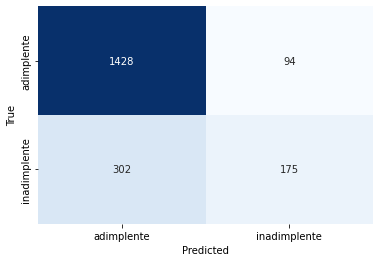

In [43]:
# Criar uma figura e um eixo
fig, ax = plt.subplots()

# Criar a matriz de calor usando seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# Definir rótulos dos eixos
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.xaxis.set_ticklabels(['adimplente', 'inadimplente'])
ax.yaxis.set_ticklabels(['adimplente', 'inadimplente'])

# Exibir a figura
plt.show()

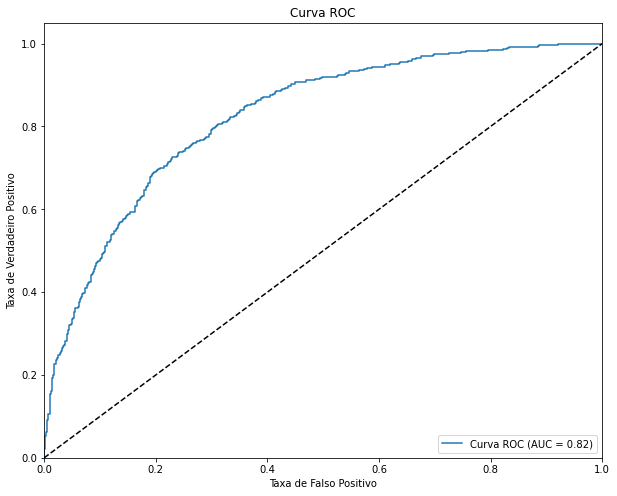

In [44]:
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y, y_prob)

# Calcular a área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_prob = sm_model.predict(x)
